<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.1.1: K-Means by the algorithm

### Australian athletes data set

##### Description
These data were collected in a study of how data on various characteristics of the blood varied with sport, body size, and sex of the athlete.

Usage
data(ais)
Format
A data frame with 202 observations on the following 13 variables.

rcc
red blood cell count, in

wcc
white blood cell count, in per liter

hc
hematocrit, percent

hg
hemaglobin concentration, in g per decaliter

ferr
plasma ferritins, ng

bmi
Body mass index, kg

ssf
sum of skin folds

pcBfat
percent Body fat

lbm
lean body mass, kg

ht
height, cm

wt
weight, kg

sex
a factor with levels f m

sport
a factor with levels B_Ball Field Gym Netball Row Swim T_400m T_Sprnt Tennis W_Polo

Source
These data were the basis for the analyses that are reported in Telford and Cunningham (1991).

References
Telford, R.D. and Cunningham, R.B. 1991. Sex, sport and body-size dependency of hematology in highly trained athletes. Medicine and Science in Sports and Exercise 23: 788-794.

**References**

[Data](http://vincentarelbundock.github.io/Rdatasets/csv/DAAG/ais.csv)

[Data Dictionary](http://vincentarelbundock.github.io/Rdatasets/doc/DAAG/ais.html)

In [3]:
# Set the number of threads to be 1 for K Means to proceed without warnings
import os
os.environ['OMP_NUM_THREADS'] = '1'

# Suppress all warnings
import warnings
warnings.filterwarnings('ignore')



In [4]:
# IMPORT LIBRARIES
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import matplotlib

import seaborn as sns

### 1. Import the data

In [6]:
csv_file = 'C:/Yan/Labs/DATA/ais.csv'
ais = pd.read_csv(csv_file, index_col=0)

In [7]:
ais.head()

rcc  wcc    hc    hg  ferr    bmi    ssf  pcBfat    lbm     ht    wt sex  \
1  3.96  7.5  37.5  12.3    60  20.56  109.1   19.75  63.32  195.9  78.9   f   
2  4.41  8.3  38.2  12.7    68  20.67  102.8   21.30  58.55  189.7  74.4   f   
3  4.14  5.0  36.4  11.6    21  21.86  104.6   19.88  55.36  177.8  69.1   f   
4  4.11  5.3  37.3  12.6    69  21.88  126.4   23.66  57.18  185.0  74.9   f   
5  4.45  6.8  41.5  14.0    29  18.96   80.3   17.64  53.20  184.6  64.6   f   

    sport  
1  B_Ball  
2  B_Ball  
3  B_Ball  
4  B_Ball  
5  B_Ball

In [8]:
ais.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202 entries, 1 to 202
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rcc     202 non-null    float64
 1   wcc     202 non-null    float64
 2   hc      202 non-null    float64
 3   hg      202 non-null    float64
 4   ferr    202 non-null    int64  
 5   bmi     202 non-null    float64
 6   ssf     202 non-null    float64
 7   pcBfat  202 non-null    float64
 8   lbm     202 non-null    float64
 9   ht      202 non-null    float64
 10  wt      202 non-null    float64
 11  sex     202 non-null    object 
 12  sport   202 non-null    object 
dtypes: float64(10), int64(1), object(2)
memory usage: 22.1+ KB


### 2. Do some EDA of relationships between features.

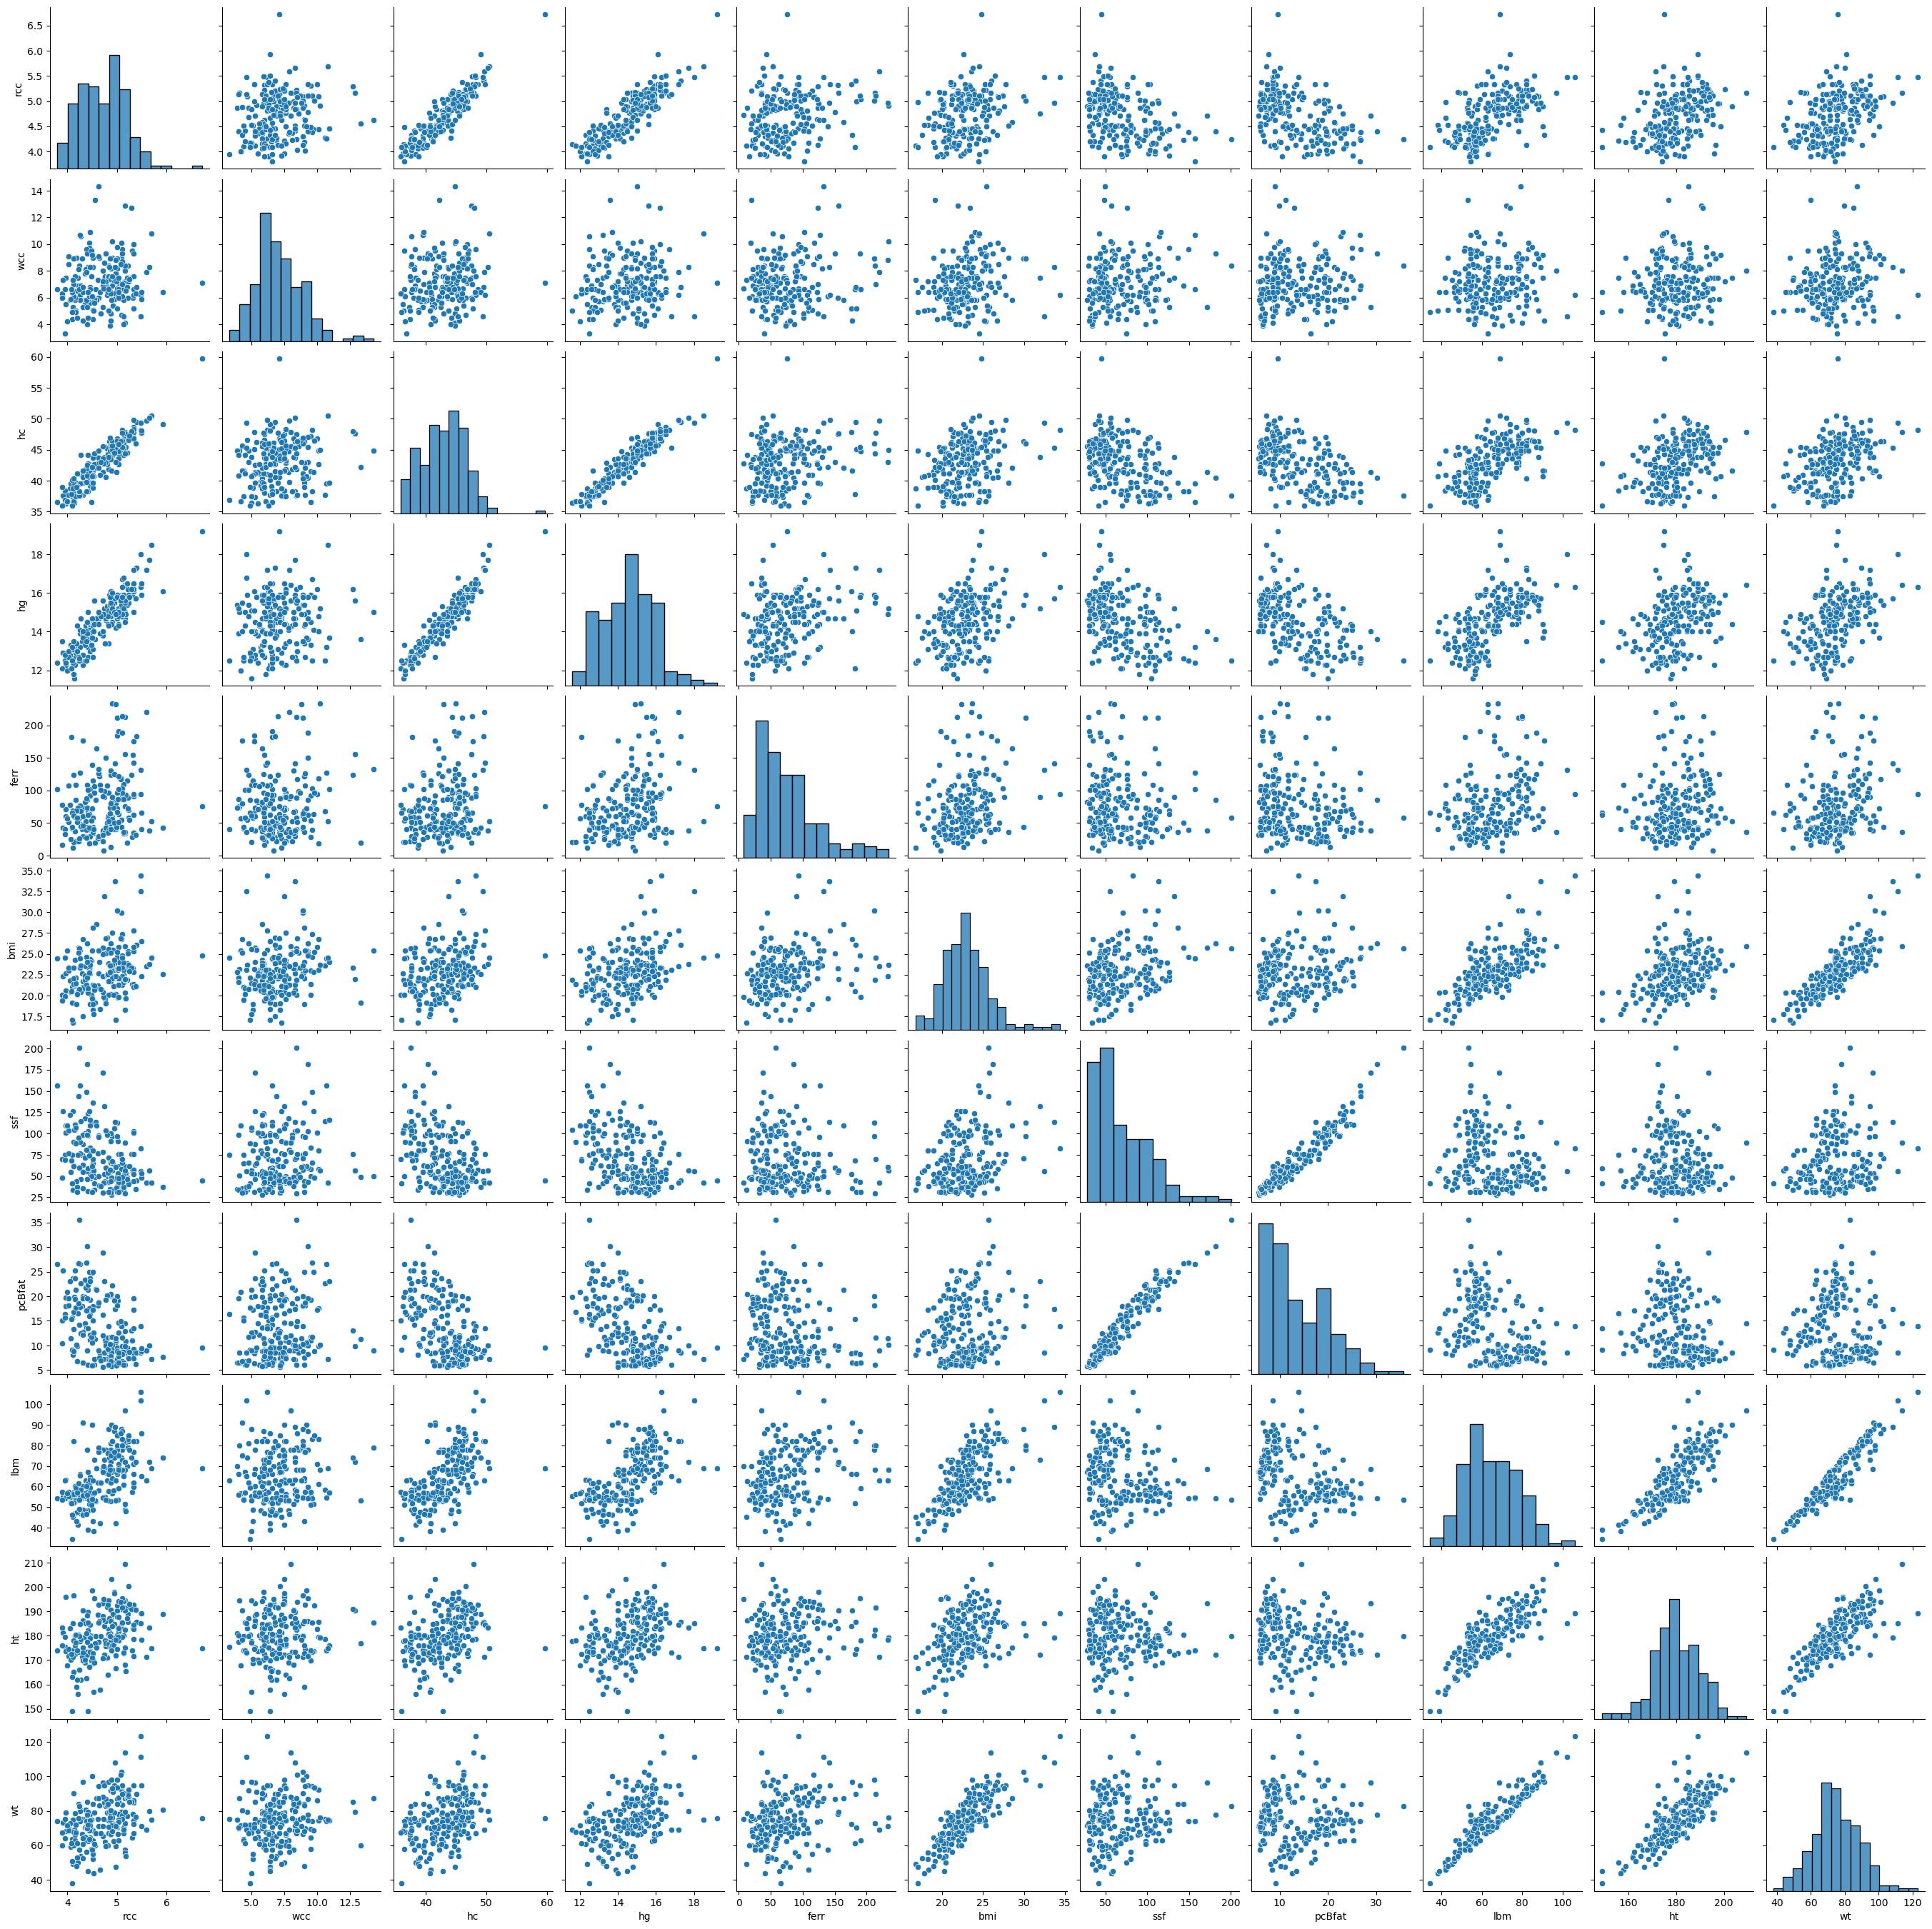

In [10]:
# Plot the Data to see the distributions/relataionships
import seaborn as sns

# Plot without the "sex" hue.
sns.pairplot(ais)
plt.show()

In [11]:
# Check for nulls
ais.isnull().sum()

rcc       0
wcc       0
hc        0
hg        0
ferr      0
bmi       0
ssf       0
pcBfat    0
lbm       0
ht        0
wt        0
sex       0
sport     0
dtype: int64

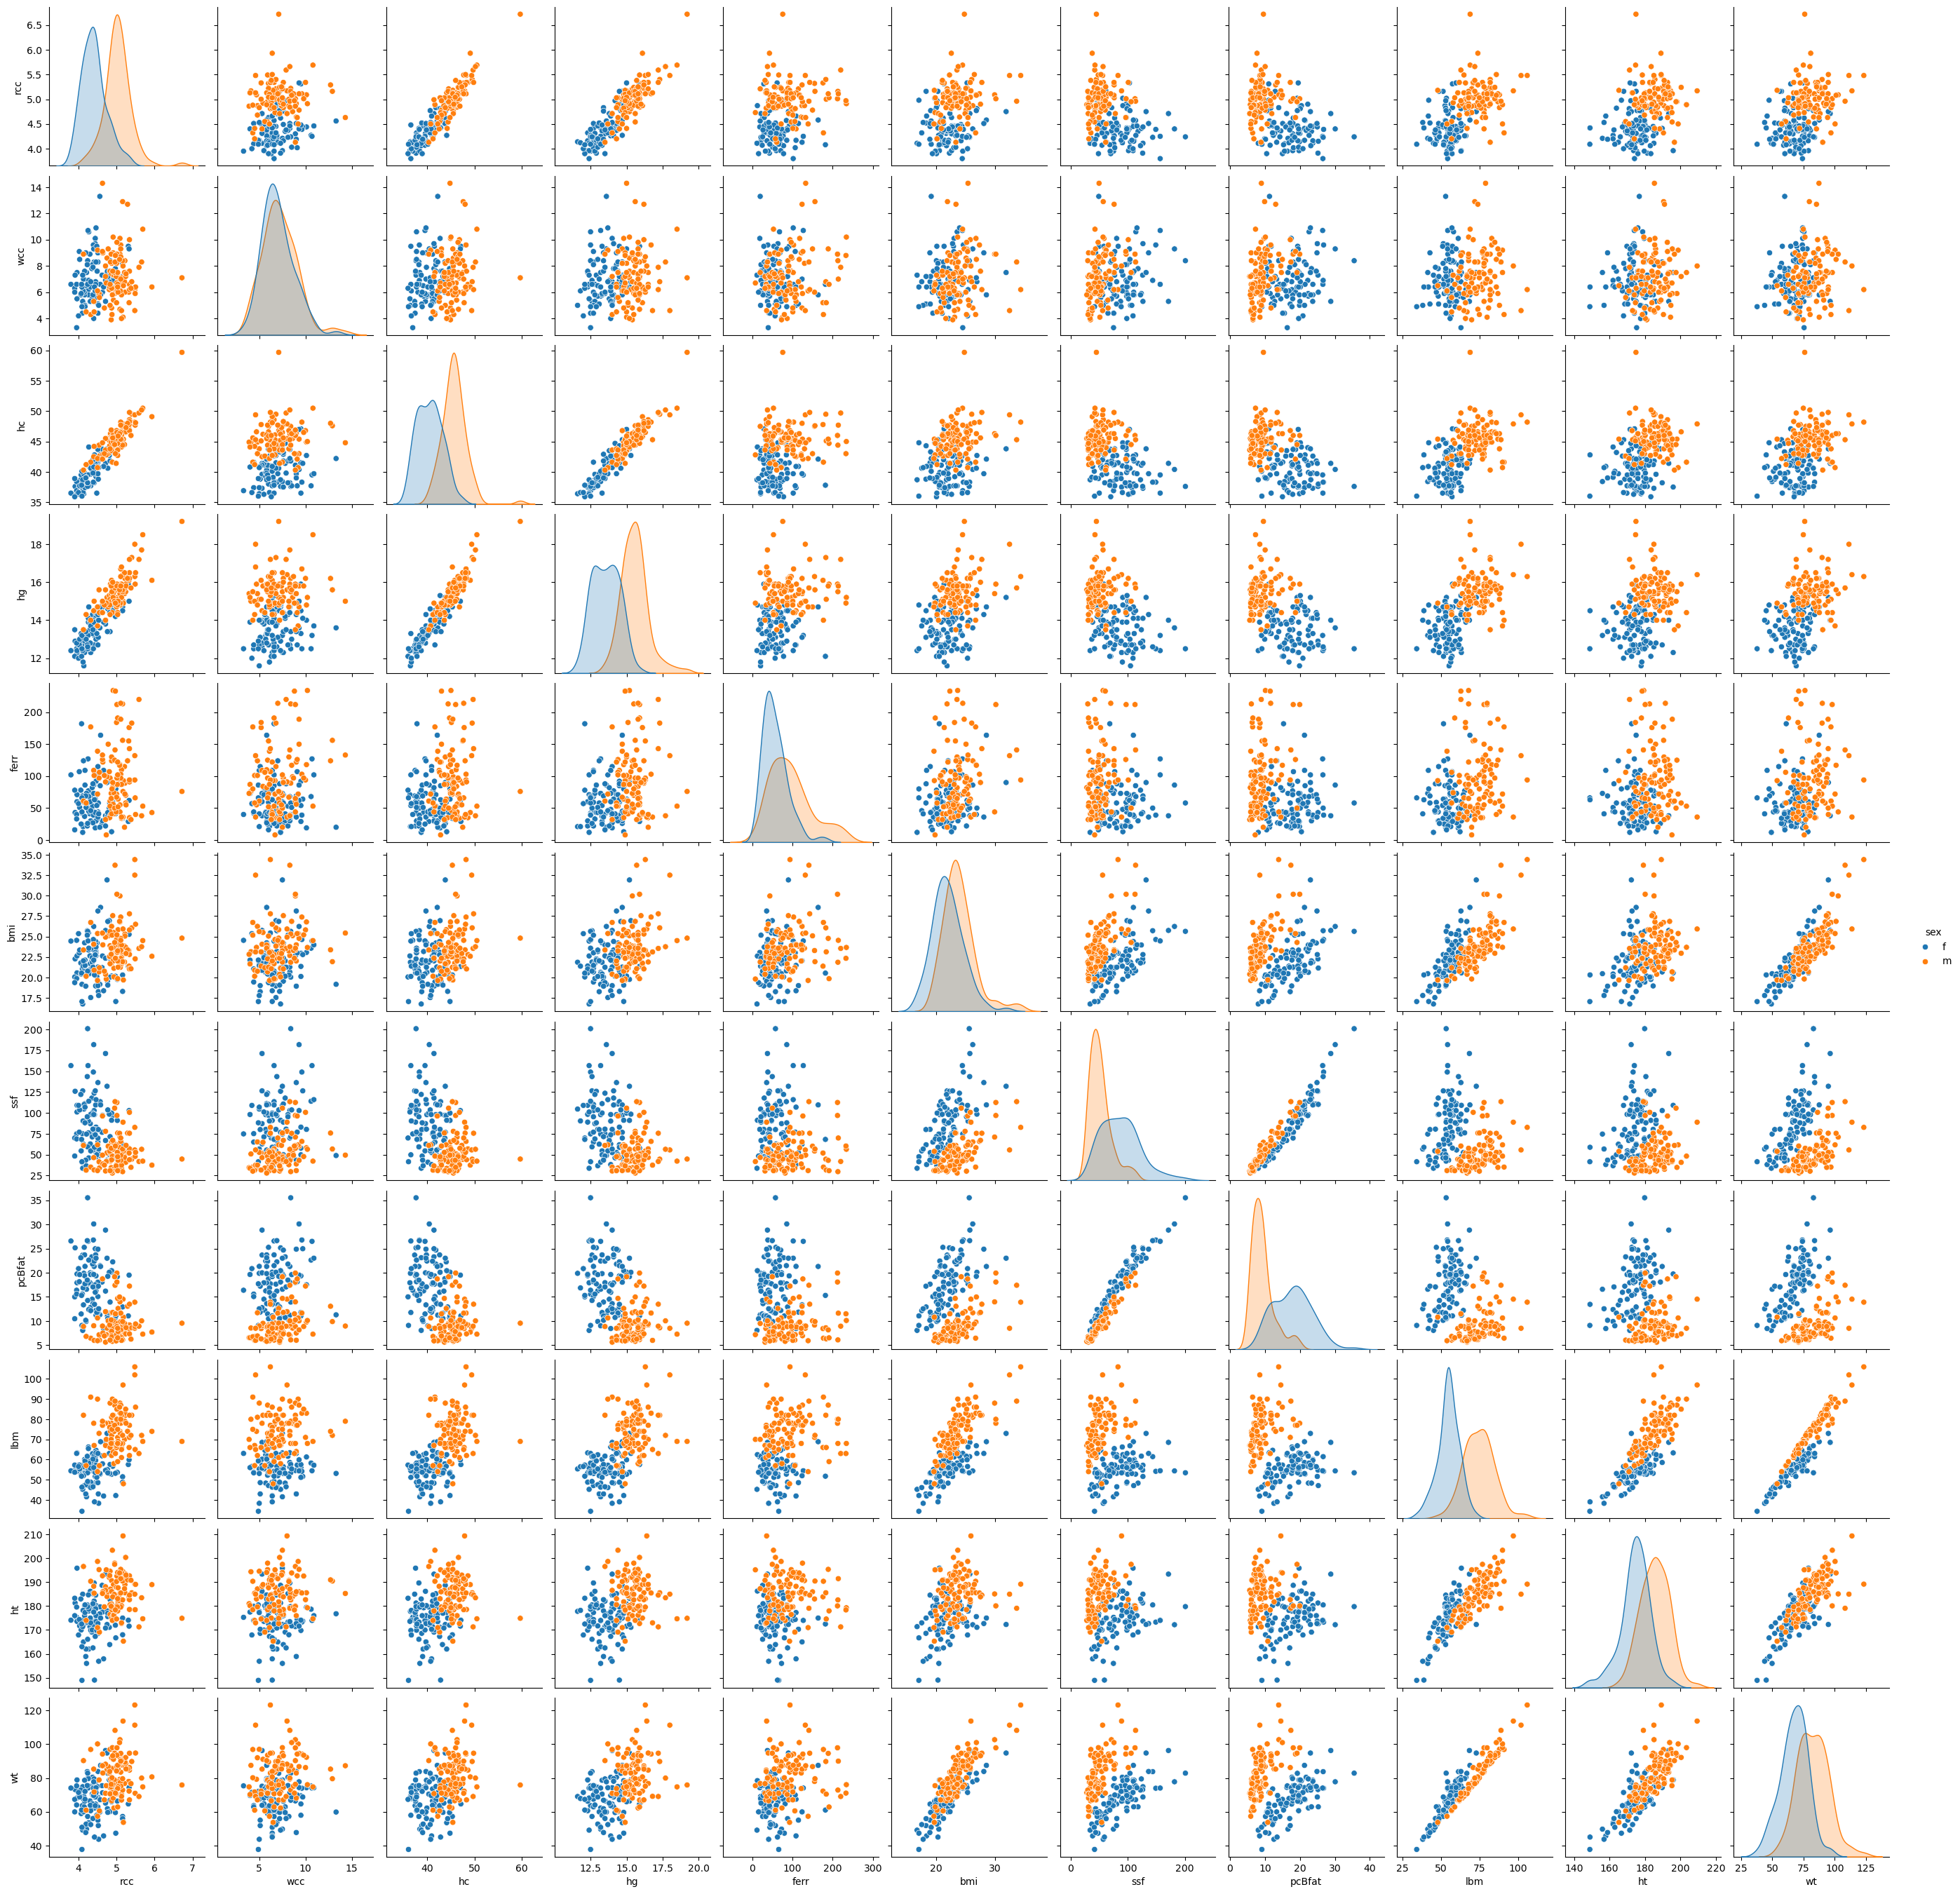

In [12]:
sns.pairplot(data=ais, hue='sex')
plt.show()

In [13]:
ais['sex'].value_counts()

sex
m    102
f    100
Name: count, dtype: int64

In [14]:
# Check datatypes
ais.dtypes

rcc       float64
wcc       float64
hc        float64
hg        float64
ferr        int64
bmi       float64
ssf       float64
pcBfat    float64
lbm       float64
ht        float64
wt        float64
sex        object
sport      object
dtype: object

### 3. Prepare the data for clustering

1. Remove the `sex`, `sport` column. We will see if the clusters from K-Means end up like the actual sex.
2. Put the features on the same scale.

In [16]:
# drop 'sex' and 'sport'
X = ais.drop(['sex', 'sport'], axis=1)

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

Xss = scaler.fit_transform(X)

### 4. Clustering with K-Means

- Cluster the data to our target groups.
    - Use sklearn.cluster.KMeans
- We know that there are 2 actual classes. Let's try using 2, 4. Run the clustering algorithm with each of those k values.

In [19]:
from sklearn.cluster import KMeans

k = 2
# 2 Clusters
k_mean2 = KMeans(n_clusters=k)
k_mean2.fit(Xss)

KMeans(n_clusters=2)

### 5. Get the labels for the models using the labels_ attribute.

In [21]:
# Labels for 2 Clusters
labels_2 = k_mean2.labels_
print(labels_2)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


### 6. Elbow Method For Optimal k

For each k value, we will initialise k-means and use the inertia attribute to identify the sum of squared distances of samples to the nearest cluster centre. As k increases, the sum of squared distance tends to zero.

In [23]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(Xss)
    Sum_of_squared_distances.append(km.inertia_)

Below is a plot of sum of squared distances for k in the range specified above. If the plot looks like an arm, then the elbow on the arm is optimal k.

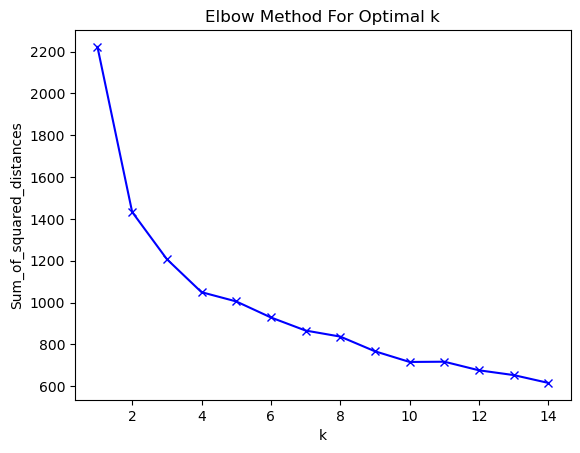

In [25]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### 7. Plot `wt` vs. `pcBfat` using the clusters from each model.

- Plot wt, pcBfat using hue sex
- Plot wt, pcBfat using hue label

The labels calculated above can be a new column of the dataset.

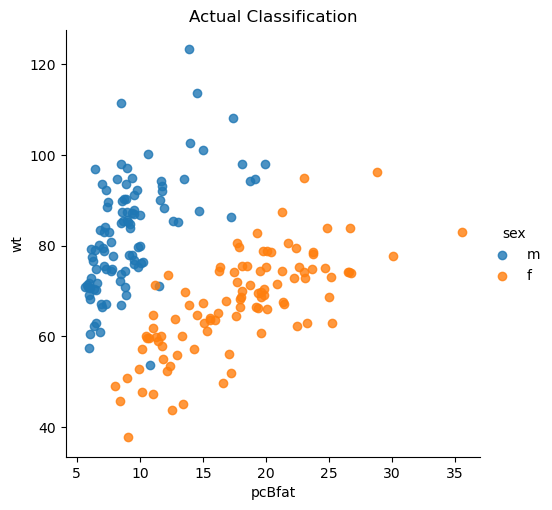

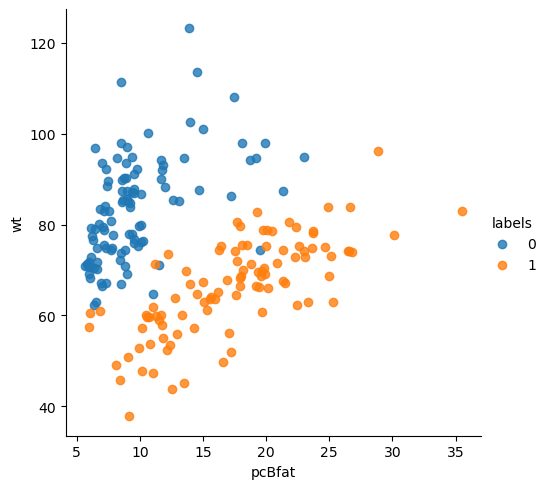

In [27]:
ais_labels = ais
ais_labels['labels'] = labels_2

sns.lmplot(x='pcBfat', y='wt', data=ais_labels, hue='sex',
           hue_order=['m', 'f'], fit_reg=False)
plt.title('Actual Classification')

sns.lmplot(x='pcBfat', y='wt', data=ais_labels, hue='labels', fit_reg=False)
#plt.title('Predicted Cluster')
plt.show()

[[11.82595238 56.57142857]
 [ 7.93826923 74.80961538]
 [21.04362069 72.80862069]
 [11.9698     93.252     ]]


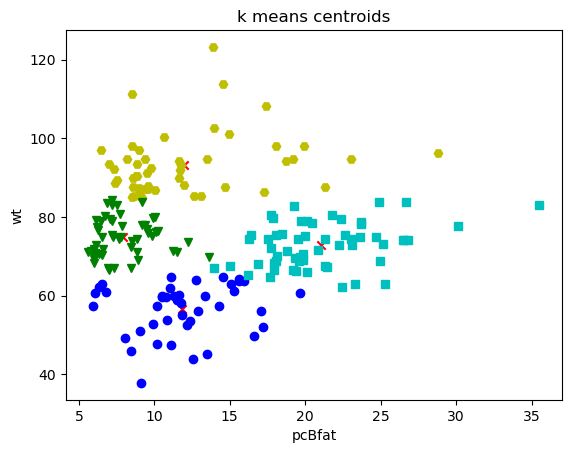

In [28]:
x1 = np.array(ais['pcBfat'])
x2 = np.array(ais['wt'])

# Create new plot and data
plt.plot()
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
colors = ['b', 'g', 'c', 'y']
markers = ['o', 'v', 's', 'H']

# KMeans algorithm
K = 4
kmeans_model = KMeans(n_clusters=K).fit(X)

print(kmeans_model.cluster_centers_)
centers = np.array(kmeans_model.cluster_centers_)

plt.plot()
plt.title('k means centroids')
plt.xlabel('pcBfat')
plt.ylabel('wt')

for i, l in enumerate(kmeans_model.labels_):
    plt.plot(x1[i], x2[i], color=colors[l], marker=markers[l], ls='None')

plt.scatter(centers[:,0], centers[:,1], marker='x', color='r')
plt.show()



---



---



> > > > > > > > > © 2025 Institute of Data


---



---



